# Proyecto básico de visualización

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Objetivos

Los objetivos de este archivo son hacer visualizaciones básicas en la Ciudad de México por alcaldías, según algunos indicadores.

Se trabajará con geometrías de la Ciudad de México, en particular las alcaldías, y se medirán algunos indicadores para poder obtener visualizaciones de dichos datos: la densidad de población y la población bruta.

#1.- Cargar los archivos


- Tenemos un archivo en formato Excel que contiene la información de los atributos (características de la geometría).

- Tenemos un archivo GeoJSON que nos proporciona los límites geográficos de las alcaldías de la Ciudad de México.

Estos dos archivos inicialmente están separados, y lo que vamos a hacer es unirlos según una columna común.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [ ]:


# Cargar el archivo Excel
df_poblacion = pd.read_excel("/content/drive/MyDrive/Servicio social Jesus Munguia Moreno/Notebook 9 Proyecto de visualizacion/atributos densidad de poblacion.xlsx")  # Reemplaza con la ruta correcta

# Cargar el archivo GeoJSON
gdf_geo = gpd.read_file("/content/drive/MyDrive/Servicio social Jesus Munguia Moreno/Notebook 9 Proyecto de visualizacion/Limites de la ciudad de mexico en formato shp/limite-de-las-alcaldas.json")  # Reemplaza con la ruta correcta


In [ ]:
df_poblacion.head()

,Unnamed: 0,Unnamed: 1,Alcaldia,Poblacion
0,NaN,NaN,Iztacalco,17523
1,NaN,NaN,Cuauhtémoc,16784
2,NaN,NaN,Benito Juárez,16260
3,NaN,NaN,Iztapalapa,16220
4,NaN,NaN,Gustavo A. Madero,13348


In [ ]:
gdf_geo.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576..."
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."


Hasta este punto, notamos que el archivo de Excel contiene los datos de atributos y la columna de alcaldía, pero no contiene ninguna columna con la geometría o las coordenadas de los límites de la Ciudad de México. Esto quiere decir que, por sí solo, ese archivo no se puede transformar en un GeoDataFrame. Se necesitan obligatoriamente las coordenadas como columnas o bien una columna de geometría, la cual se obtiene al usar el segundo archivo de tipo GeoJSON, que contiene dicha columna de geometría.

Ahora el objetivo es unir estas dos tablas. Antes de unirlas, comprobemos que no haya irregularidades para poder hacer bien la unión a partir de la columna en común que contiene las alcaldías.

Limpiar los datos si es necesario, ya que el df_poblacion podría contener espacios adicionales o nombres ligeramente distintos a los de gdf_geo. Por lo tanto, vamos a normalizar o igualar los caracteres de ambas columnas, observación a observación, de los nombres de alcaldías:

In [ ]:
df_poblacion["Alcaldia"] = df_poblacion["Alcaldia"].str.strip()
gdf_geo["NOMGEO"] = gdf_geo["NOMGEO"].str.strip()

El paso previo es necesario hacerlo ya que si los nombres de las columnas que vamos a unir no coincide no se podrá ser exitosamente la Unión

In [ ]:
num_categorias_excel = df_poblacion['Alcaldia'].nunique()
num_categorias_GeoJson = gdf_geo['NOMGEO'].nunique()
print("Número de categorías en el archivo Excel:", num_categorias_excel)
print("Número de categorías en el archivo GeoJSON:", num_categorias_GeoJson)

Número de categorías en el archivo Excel: 16
Número de categorías en el archivo GeoJSON: 16


Ahora sí podemos unir a partir de una columna exactamente identica en ambas tablas

La clave común es el nombre de la alcaldía. Usamos un merge (con parametro left join) entre el DataFrame de población y el GeoDataFrame:

In [ ]:
gdf_final = gdf_geo.merge(df_poblacion, left_on="NOMGEO", right_on="Alcaldia", how="left")



Ya que tenemos un geodataframe con una atributo o indicador de densidad de población podemos resguardar el nuevo archivo

In [ ]:
gdf_final.to_file("geo_poblacion.geojson", driver="GeoJSON")

In [ ]:
gdf_final.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,Unnamed: 0,Unnamed: 1,Alcaldia,Poblacion
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",NaN,NaN,Azcapotzalco,12893
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",NaN,NaN,Coyoacán,11395
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",NaN,NaN,Cuajimalpa de Morelos,3059
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",NaN,NaN,Gustavo A. Madero,13348
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",NaN,NaN,Iztacalco,17523


In [ ]:
type(gdf_final)

geopandas.geodataframe.GeoDataFrame

En este punto ya tenemos unida la información geográfica que corresponde a las geometrías así como el indicador de densidad población. Falta hacer algunas limpieza hasta ese punto pero el objetivo principal ya está listo para empezar a trabajar las visualizaciones con este Godataframe

In [ ]:
#lo descragamos
from google.colab import files
files.download("geo_poblacion.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2.- Limpieza y exploración básica

In [ ]:
#quedarnos solo con las columnas relevantes
gdf = gdf_final[['geometry', 'Alcaldia', 'Poblacion']]
display(gdf)

,geometry,Alcaldia,Poblacion
0,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",Azcapotzalco,12893
1,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",Coyoacán,11395
2,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",Cuajimalpa de Morelos,3059
3,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",Gustavo A. Madero,13348
4,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",Iztacalco,17523
5,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",Iztapalapa,16220
6,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",La Magdalena Contreras,3905
7,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",Milpa Alta,512
8,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",Álvaro Obregón,7916
9,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",Tláhuac,4570


In [ ]:
# Cambiamos el nombre de población por densidad de población ya que ése es el indicador correcto en este caso
gdf.rename(columns={'Poblacion': 'Densidad_poblacion'}, inplace=True)
gdf

<ipython-input-8-dc55210c0a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.rename(columns={'Poblacion': 'Densidad_poblacion'}, inplace=True)


,geometry,Alcaldia,Densidad_poblacion
0,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",Azcapotzalco,12893
1,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",Coyoacán,11395
2,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",Cuajimalpa de Morelos,3059
3,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",Gustavo A. Madero,13348
4,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",Iztacalco,17523
5,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",Iztapalapa,16220
6,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",La Magdalena Contreras,3905
7,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",Milpa Alta,512
8,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",Álvaro Obregón,7916
9,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",Tláhuac,4570


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geometry            16 non-null     geometry
 1   Alcaldia            16 non-null     object  
 2   Densidad_poblacion  16 non-null     int64   
dtypes: geometry(1), int64(1), object(1)
memory usage: 516.0+ bytes


In [ ]:
gdf.describe()

,Densidad_poblacion
count,16.000000
mean,9532.312500
std,5867.561432
min,512.000000
25%,3897.500000
50%,10161.500000
75%,14066.000000
max,17523.000000


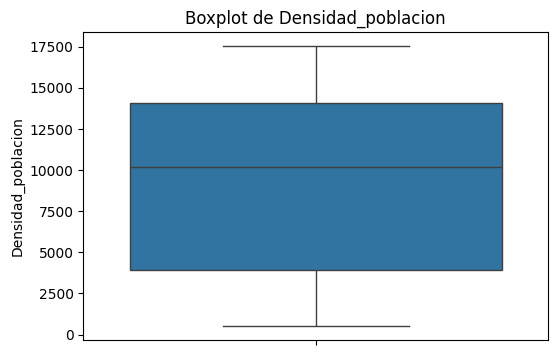

In [ ]:
# Investigamos la distribución de la variable indicador densidad de población
columna="Densidad_poblacion"

plt.figure(figsize=(6, 4))
sns.boxplot(y=gdf[columna])
plt.title(f"Boxplot de {columna}")
plt.show()

In [ ]:
#Conocer el tipo de sistema de referencia que estamos usando
print(gdf.crs)

EPSG:4326


significa que el CRS es WGS 84 (latitud/longitud en grados).

No hay un sistema de referencia ideal y depende mucho del tipo de análisis que se quiera hacer en este caso este sistema de referencia es óptimo para las visualizaciones de densidad de población, por ejemplo.

#3.- Algunas visualizaciones

<Axes: >

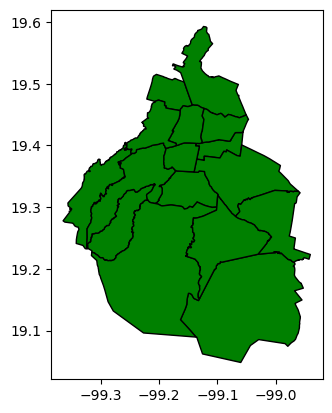

In [ ]:
# Dibujar el mapa básico de los límites de la Ciudad de México Con color verde
gdf.plot(color="green", edgecolor="black")

Text(0.5, 1.0, 'Densidad de población en la Ciudad de México')

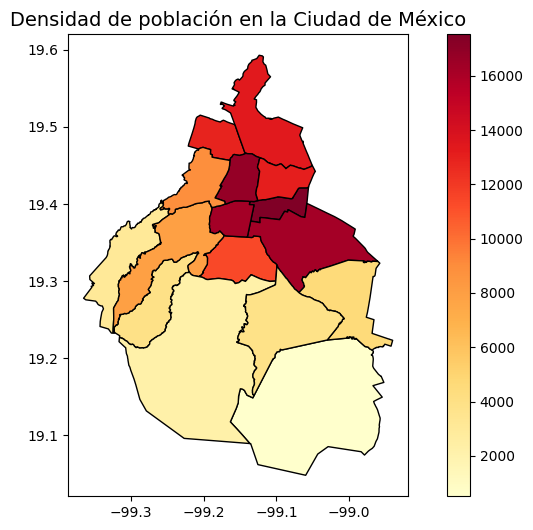

In [ ]:
# Dibujamos la densidad de población en la Ciudad de México con un mapa de calor
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el GeoDataFrame en el eje especificado
gdf.plot(column="Densidad_poblacion", cmap="YlOrRd", legend=True, edgecolor="black", ax=ax)

# Agregar el título
ax.set_title("Densidad de población en la Ciudad de México", fontsize=14)



In [ ]:
# Ahora hacemos la misma visualización pero confolium y agregando circunferencias con gradientes

import geopandas as gpd
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Crear un mapa centrado en la Ciudad de México
m = folium.Map(location=[19.4, -99.1], zoom_start=11)

# Agregar las alcaldías con colores según la densidad de población (rojo)
folium.Choropleth(
    geo_data=gdf,
    name="Densidad_poblacion",
    data=gdf,
    columns=["Alcaldia", "Densidad_poblacion"],
    key_on="feature.properties.Alcaldia",
    fill_color="YlOrRd",  # Paleta de colores rojos
    fill_opacity=0.7,
    line_opacity=0.7,
    line_color='black',
    nan_fill_color="white",
    highlight=True,
    legend_name="Densidad de población (hab/km²)",
    smooth_factor=0
).add_to(m)

# Agregar el mapa de calor con los centroides de cada alcaldía
heat_data = [[geom.centroid.y, geom.centroid.x, dens] for geom, dens in zip(gdf.geometry, gdf["Densidad_poblacion"])]
HeatMap(heat_data, radius=20).add_to(m)

# Mostrar el mapa
display(m)

In [ ]:
#Ahora mejoraremos la visualización previa introduciendo tooltips con la información de cada alcaldía, pero ahora con paleta azul
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Crear un mapa centrado en la Ciudad de México
m = folium.Map(location=[19.4, -99.1], zoom_start=11)

# Agregar las alcaldías con colores según la densidad de población
choropleth = folium.Choropleth(
    geo_data=gdf,
    name="Densidad_poblacion",
    data=gdf,
    columns=["Alcaldia", "Densidad_poblacion"],
    key_on="feature.properties.Alcaldia",
    fill_color="PuBu",
    fill_opacity=0.7,
    line_opacity=0.7,
    legend_name="Densidad de población (hab/km²)"
).add_to(m)

# Agregar tooltips con la densidad de población
folium.GeoJson(
    gdf,
    name="Alcaldías",
    tooltip=folium.GeoJsonTooltip(
        fields=["Alcaldia", "Densidad_poblacion"],
        aliases=["Alcaldía:", "Densidad de población (hab/km²):"],
        localize=True
    )
).add_to(m)

# Agregar el mapa de calor con los centroides de cada alcaldía
heat_data = [[geom.centroid.y, geom.centroid.x, dens] for geom, dens in zip(gdf.geometry, gdf["Densidad_poblacion"])]
HeatMap(heat_data, radius=20).add_to(m)

# Mostrar el mapa
display(m)


Como se puede notar esta Misma visualización se puede aplicar por ejemplo a la población bruta por alcaldía o por ejemplo el número de trabajadores en cada polígono es decir en cada alcaldía. Lo único que se debe de conseguir son los datos correspondientes ya que el código es exactamente lo mismo modificando lo correspondiente.

Si graficáramos un diagrama de dispersión con la circunferencia de densidad de población podemos obtener una idea sin graficar el mapa de cómo se distribuyen la densidad de población en la Ciudad de México

In [ ]:

import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Crear un mapa centrado en la Ciudad de México
m = folium.Map(location=[19.4, -99.1], zoom_start=11)

# Agregar círculos en los centroides con tamaño proporcional a la densidad de población
for geom, dens in zip(gdf.geometry, gdf["Densidad_poblacion"]):
    folium.CircleMarker(
        location=[geom.centroid.y, geom.centroid.x],
        radius=dens / 1000,  # Ajusta el divisor según el tamaño deseado
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.5,
    ).add_to(m)

# Mostrar el mapa
display(m)


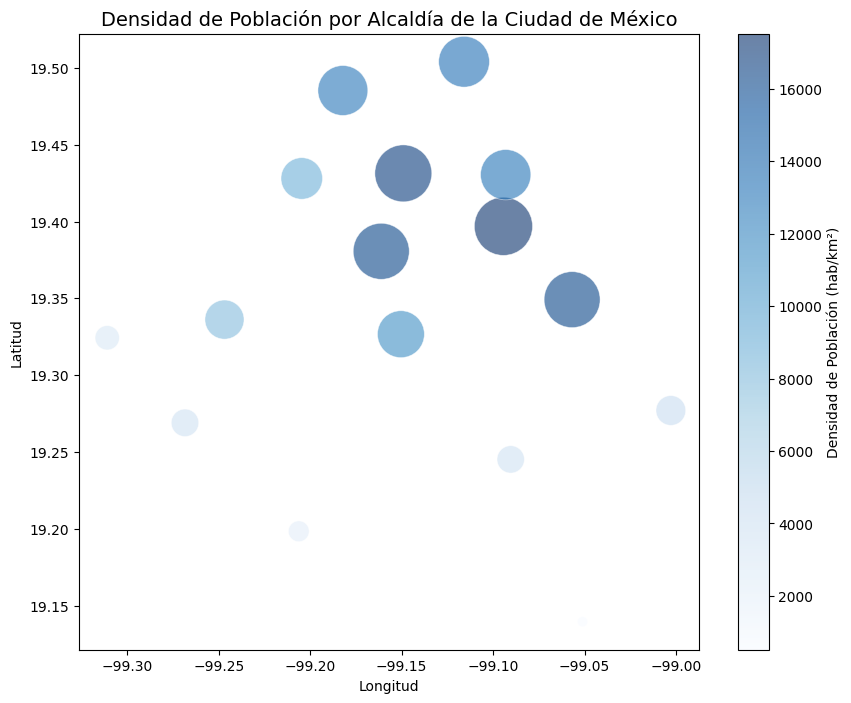

In [ ]:
# Hacemos un diagrama de dispersión para ver rápidamente la densidad
import matplotlib.pyplot as plt
import geopandas as gpd

# Extraer las coordenadas de los centroides y la densidad de población
centroides = [geom.centroid for geom in gdf.geometry]
densidades = gdf["Densidad_poblacion"]

# Extraer las coordenadas X e Y de los centroides
x = [c.x for c in centroides]
y = [c.y for c in centroides]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))

# Ajustar el tamaño de las circunferencias en base a la densidad
plt.scatter(x, y, s=densidades / 10, c=densidades, cmap='Blues', alpha=0.6, edgecolors="w", linewidth=0.5)

# Títulos y etiquetas
plt.title("Densidad de Población por Alcaldía de la Ciudad de México", fontsize=14)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.colorbar(label="Densidad de Población (hab/km²)")

# Mostrar el gráfico
plt.show()


Ahora nos puede interesar conocer la población por género en la Ciudad de México.
 Para ello se ha conseguido la base de datos correspondiente

In [ ]:
# Cargar el archivo Excel
df_poblacion_genero = pd.read_csv("/content/drive/MyDrive/Servicio social Jesus Munguia Moreno/Notebook 9 Proyecto de visualizacion/data-2025-04-02 densidad hombres mujeres cdmx.csv")  # Reemplaza con la ruta correcta
df_poblacion_genero.head()

,alcaldia,sexo,rango_edad,poblacion
0,AZCAPOTZALCO,Hombre,a) 0 a 4 años,10794
1,AZCAPOTZALCO,Hombre,b) 5 a 9 años,11950
2,AZCAPOTZALCO,Hombre,c) 10 a 14 años,13219
3,AZCAPOTZALCO,Hombre,d) 15 a 19 años,14272
4,AZCAPOTZALCO,Hombre,e) 20 a 24 años,15895


note que no necesariamente es adecuada para el análisis entonces hay que reestructura la tabla

In [ ]:
df_poblacion_genero.shape

(576, 4)

In [ ]:
print("Las categorías únicas de la columna sexo son:")
for categoria in df_poblacion_genero['sexo'].unique():
    print(categoria)

Las categorías únicas de la columna sexo son:
Hombre
Mujer


Vemos que tenemos un problema un poco más complejo que al inicio; es decir, necesitamos tener forzosamente 16 filas para poder hacer el merge con el GeoDataFrame que contiene la columna de geometrías y así poder hacer mapas.

Esto lo haremos separando dos datasets con la suma de población de mujeres y de hombres según la alcaldía.

Este análisis lo realizaremos con MySQL.


In [ ]:
df_poblacion_genero.head()

,alcaldia,sexo,rango_edad,poblacion
0,AZCAPOTZALCO,Hombre,a) 0 a 4 años,10794
1,AZCAPOTZALCO,Hombre,b) 5 a 9 años,11950
2,AZCAPOTZALCO,Hombre,c) 10 a 14 años,13219
3,AZCAPOTZALCO,Hombre,d) 15 a 19 años,14272
4,AZCAPOTZALCO,Hombre,e) 20 a 24 años,15895


Note que la tabla también tiene información sobre las edades entonces podríamos reducir el rango de edades por género agruparlos y obtener otro tipo de visualización pero eso se omitirá para simplificar el análisis

Haremos la siguiente limpieza para esta tabla:

- Eliminar la columna de rango de edades
- Hacer un data set de hombres y uno de mujeres
- En cada dataet sumar la población por alcaldía

De esta forma obtendremos dos data sets, uno de hombres y otro de mujeres en donde tengamos 16 Filas con la suma total por alcaldía



In [ ]:
df_hombres = pd.read_csv("/content/drive/MyDrive/Servicio social Jesus Munguia Moreno/Notebook 9 Proyecto de visualizacion/Poblacion por genero/poblacion hombres.csv")


In [ ]:
df_hombres.to_excel("poblacion_hombres.xlsx", index=False)
df_hombres

,alcaldia,total_poblacion_hombres
0,AZCAPOTZALCO,204768
1,COYOACAN,289048
2,CUAJIMALPA DE MORELOS,104090
3,GUSTAVO A. MADERO,563760
4,IZTACALCO,192264
5,IZTAPALAPA,887456
6,LA MAGDALENA CONTRERAS,118268
7,MILPA ALTA,74364
8,ALVARO OBREGON,360596
9,TLAHUAC,190118


In [ ]:
df_mujeres = pd.read_csv("/content/drive/MyDrive/Servicio social Jesus Munguia Moreno/Notebook 9 Proyecto de visualizacion/Poblacion por genero/poblacion mujeres.csv")
df_mujeres

,alcaldia,total_poblacion_mujer
0,AZCAPOTZALCO,227072
1,COYOACAN,325271
2,CUAJIMALPA DE MORELOS,113480
3,GUSTAVO A. MADERO,609357
4,IZTACALCO,212253
5,IZTAPALAPA,947635
6,LA MAGDALENA CONTRERAS,129311
7,MILPA ALTA,78307
8,ALVARO OBREGON,397718
9,TLAHUAC,202050


El script de limpieza de SQL se encuentra en una subcarpeta llamada "poblacion por genero" que está dentro de esta carpeta

Comprobamos que la suma total nos da un valor aproximado al valor real de la población

In [ ]:
suma_hombres = df_hombres['total_poblacion_hombres'].sum()
print("Suma total de hombres:", suma_hombres)

Suma total de hombres: 4400144


In [ ]:
suma_mujeres = df_mujeres['total_poblacion_mujer'].sum()
print("Suma total de mujeres:", suma_mujeres)

Suma total de mujeres: 4800174


In [ ]:
# Obtenemos la suma total de hombres y mujeres
poblacion_cdmx = suma_hombres + suma_mujeres
print("Población total de la Ciudad de México:", poblacion_cdmx)

Población total de la Ciudad de México: 9200318


In [ ]:


# Normaliza los nombres de alcaldías en ambos dataframes (sin tildes, todo en mayúsculas)
df_hombres['alcaldia_norm'] = df_hombres['alcaldia'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
gdf_geo['alcaldia_norm'] = gdf_geo['NOMGEO'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Une ambos DataFrames en un GeoDataFrame
gdf_merged = gdf_geo.merge(df_hombres, on='alcaldia_norm')

# Opcional: eliminar columna auxiliar si ya no se necesita
gdf_merged = gdf_merged.drop(columns=['alcaldia_norm'])




In [ ]:
print(gdf_merged.columns)


Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry', 'alcaldia',
       'total_poblacion_hombres', 'alcaldia_normalizada'],
      dtype='object')


In [ ]:
#quedarnos solo con las columnas relevantes
gdf_hombres = gdf_merged[['geometry', 'alcaldia', 'total_poblacion_hombres']]
display(gdf_hombres)

,geometry,alcaldia,total_poblacion_hombres
0,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",AZCAPOTZALCO,204768
1,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",COYOACAN,289048
2,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",CUAJIMALPA DE MORELOS,104090
3,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",GUSTAVO A. MADERO,563760
4,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",IZTACALCO,192264
5,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",IZTAPALAPA,887456
6,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",LA MAGDALENA CONTRERAS,118268
7,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",MILPA ALTA,74364
8,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",ALVARO OBREGON,360596
9,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",TLAHUAC,190118


In [ ]:
#Ahora haremos lo mismo para las mujeres
# Normaliza los nombres de alcaldías en ambos dataframes (sin tildes, todo en mayúsculas)
df_mujeres['alcaldia_norm'] = df_mujeres['alcaldia'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
gdf_geo['alcaldia_norm'] = gdf_geo['NOMGEO'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Une ambos DataFrames en un GeoDataFrame
gdf_merged = gdf_geo.merge(df_mujeres, on='alcaldia_norm')

# Opcional: eliminar columna auxiliar si ya no se necesita
gdf_merged = gdf_merged.drop(columns=['alcaldia_norm'])


In [ ]:
print(gdf_merged.columns)

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry', 'alcaldia',
       'total_poblacion_mujer'],
      dtype='object')


In [ ]:
#quedarnos solo con las columnas relevantes
gdf_mujeres = gdf_merged[['geometry', 'alcaldia', 'total_poblacion_mujer']]
display(gdf_mujeres)

,geometry,alcaldia,total_poblacion_mujer
0,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",AZCAPOTZALCO,227072
1,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",COYOACAN,325271
2,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",CUAJIMALPA DE MORELOS,113480
3,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",GUSTAVO A. MADERO,609357
4,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",IZTACALCO,212253
5,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",IZTAPALAPA,947635
6,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",LA MAGDALENA CONTRERAS,129311
7,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",MILPA ALTA,78307
8,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",ALVARO OBREGON,397718
9,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",TLAHUAC,202050


In [ ]:
print(type(gdf_hombres))
print(type(gdf_mujeres))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


Text(0.5, 1.0, 'Población hombres en la Ciudad de México')

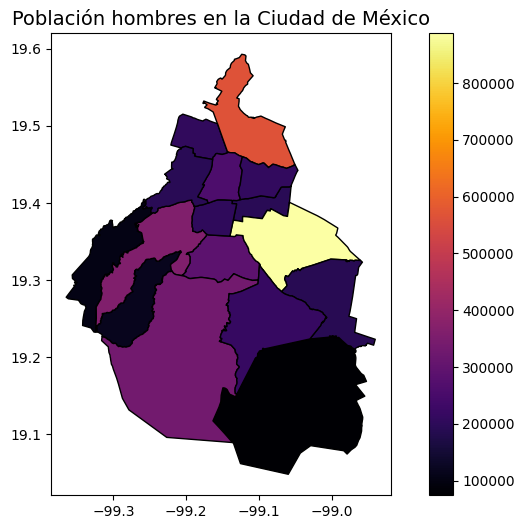

In [ ]:
# Dibujamos la población en la Ciudad de México con un mapa de calor para hombres
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el GeoDataFrame en el eje especificado
gdf_hombres.plot(column="total_poblacion_hombres", cmap="inferno", legend=True, edgecolor="black", ax=ax)

# Agregar el título
ax.set_title("Población hombres en la Ciudad de México", fontsize=14)


Text(0.5, 1.0, 'Población mujeres en la Ciudad de México')

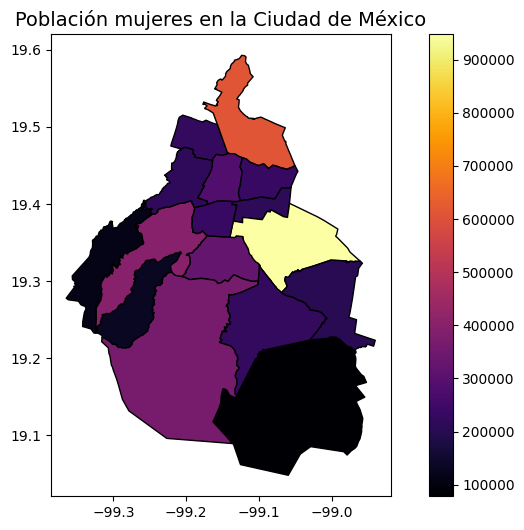

In [ ]:
# Hacemos lo mismo pero ahora para las mujeres
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el GeoDataFrame en el eje especificado
gdf_mujeres.plot(column="total_poblacion_mujer", cmap="inferno", legend=True, edgecolor="black", ax=ax)

# Agregar el título
ax.set_title("Población mujeres en la Ciudad de México", fontsize=14)

Vemos que la distribución en la población para hombres y mujeres es aproximadamente la misma o hay muy pequeña variación en ésta por alcaldía ya que los colores evidencian eso

Vamos a comprobar ese hecho contabilizando en número de hombres y mujeres en cada alcaldía

In [ ]:


# Supongamos que tienes algo así:
# df1 = pd.DataFrame({'columna_a': [1, 2, 3]})
# df2 = pd.DataFrame({'columna_b': ['a', 'b', 'c']})

# Crear un nuevo DataFrame con columnas específicas de df1 y df2
comparacion_df= pd.DataFrame({
    'Alcaldia': gdf_hombres['alcaldia'],
    'Hombres': gdf_hombres['total_poblacion_hombres'],
    'Mujeres': gdf_mujeres['total_poblacion_mujer'],
    'diferencia de poblacion': abs(gdf_hombres['total_poblacion_hombres'] - gdf_mujeres['total_poblacion_mujer'])
})

# Mostrar el nuevo DataFrame

display(comparacion_df)


,Alcaldia,Hombres,Mujeres,diferencia de poblacion
0,AZCAPOTZALCO,204768,227072,22304
1,COYOACAN,289048,325271,36223
2,CUAJIMALPA DE MORELOS,104090,113480,9390
3,GUSTAVO A. MADERO,563760,609357,45597
4,IZTACALCO,192264,212253,19989
5,IZTAPALAPA,887456,947635,60179
6,LA MAGDALENA CONTRERAS,118268,129311,11043
7,MILPA ALTA,74364,78307,3943
8,ALVARO OBREGON,360596,397718,37122
9,TLAHUAC,190118,202050,11932


Aunque la diferencia en algunas alcaldías es significativa recordemos que estamos hablando en rangos de cientos de miles entonces al momento de dibujar el mapa no se ve tan marcados por los colores

Vamos a intentar calcular la distancia donde hay mayor población y donde hay menor población respecto a las mujeres

In [ ]:
max_poblacion = gdf_mujeres.loc[gdf_mujeres["total_poblacion_mujer"].idxmax()]
min_poblacion = gdf_mujeres.loc[gdf_mujeres["total_poblacion_mujer"].idxmin()]


print("Alcaldía con mayor población de mujeres:", max_poblacion["alcaldia"])
print("Alcaldía con menor población de mujeres:", min_poblacion["alcaldia"])

Alcaldía con mayor población de mujeres: IZTAPALAPA
Alcaldía con menor población de mujeres: MILPA ALTA


In [ ]:
# Polígonos con mayor y menor densidad
max_poblacion = gdf_mujeres.loc[gdf_mujeres["total_poblacion_mujer"].idxmax()]
min_poblacion = gdf_mujeres.loc[gdf_mujeres["total_poblacion_mujer"].idxmin()]

# Centroides
centroide_max = max_poblacion.geometry.centroid
centroide_min = min_poblacion.geometry.centroid


In [ ]:
from geopy.distance import geodesic

# Coordenadas (latitud, longitud)
iztapalapa = (centroide_max.y, centroide_max.x)
milpa_alta = (centroide_min.y, centroide_min.x)

# Calcular la distancia geodésica en km
distancia_km = geodesic(iztapalapa, milpa_alta).kilometers

print(f"La distancia geográfica entre el polígono con mayor y menor () poblacion de mujeres es de {distancia_km:.2f} km.")


La distancia geográfica entre el polígono con mayor y menor () poblacion de mujeres es de 23.22 km.


Note que esta distancia puede ser un poco imprecisa ya que ese cálculo se maneja como polígonos. Es decir el cálculo de la alcaldía donde hay mayor población de mujeres a la que hay menor población de mujeres se calcula a partir del centro geométrico del polígono. Pero geográficamente es un excelente idea para saber la distancia real que existe entre ellas